In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
assets=['AAPL', '^GSPC'] #SP500
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
pf_data.tail()

,AAPL,^GSPC
Date,,
2020-10-20,117.510002,3443.120117
2020-10-21,116.870003,3435.560059
2020-10-22,115.750000,3453.489990
2020-10-23,115.040001,3465.389893
2020-10-26,115.050003,3400.969971


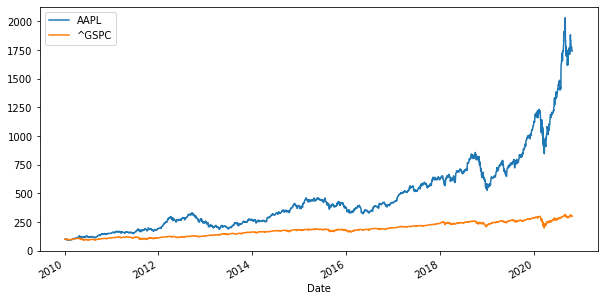

In [4]:
(pf_data/pf_data.iloc[0]*100).plot(figsize=(10,5))

In [5]:
log_returns = np.log(pf_data/pf_data.shift(1)) 

In [6]:
log_returns.mean()*250 #Média

AAPL     0.262451
^GSPC    0.100955
dtype: float64

In [7]:
log_returns.cov()*250 #Covariância

,AAPL,^GSPC
AAPL,0.079121,0.032597
^GSPC,0.032597,0.030681


In [9]:
log_returns.corr() #Correlação

,AAPL,^GSPC
AAPL,1.000000,0.661607
^GSPC,0.661607,1.000000


In [10]:
num_assets = len(assets)

In [11]:
num_assets

2

In [14]:
arr = np.random.random(2)

In [15]:
arr

array([0.69952287, 0.0967136 ])

In [18]:
arr[0]+arr[1]

0.7962364672710872

In [19]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.65158463, 0.34841537])

In [20]:
weights[0]+weights[1]

1.0

In [21]:
#Retorno esperado de um portfólio
np.sum(weights*log_returns.mean()) *250

0.2061836009893311

In [22]:
#Variancia esperada de um portfólio
np.dot(weights.T, np.dot(log_returns.cov()*250,weights))

0.05211699652883386

In [24]:
#Volatidade esperada de um portfólio
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights)))

0.22829147274664874

In [25]:
#Retorno x Volatilidade
pfolio_returns=[]
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights/=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean()) *250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))))
    
pfolio_returns, pfolio_volatilities

([0.19731932540162442,
  0.25019552775493425,
  0.17501414592117312,
  0.1758086790864871,
  0.12918757638455283,
  0.19207283960814686,
  0.18553277665994694,
  0.2141839596539893,
  0.2224197264964007,
  0.19963328128485217,
  0.17620105531908228,
  0.10721956131578796,
  0.1480953496409183,
  0.17715787198489477,
  0.2295929521049437,
  0.11053195946244564,
  0.22623496225464415,
  0.15142731990880592,
  0.2402660015614471,
  0.2086733952809019,
  0.2142864283823076,
  0.1588853279157828,
  0.2015180012455906,
  0.1654930249704373,
  0.13885432845362541,
  0.229844322200434,
  0.16324488380685986,
  0.2344330732229671,
  0.11530039596495503,
  0.17880951256710914,
  0.17707374939422876,
  0.22757517220551002,
  0.1895630297310078,
  0.22874685606078946,
  0.21953639613482018,
  0.14152085145221668,
  0.16176861351027352,
  0.11199948763832852,
  0.1858139720620055,
  0.12309865025294012,
  0.16673626766684485,
  0.1363062880845651,
  0.11944642890570742,
  0.1909114936543516,
  0.17

In [26]:
#Retorno x Volatilidade
pfolio_returns=[]
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights/=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean()) *250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*250,weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
    
pfolio_returns, pfolio_volatilities

(array([0.11802966, 0.10232232, 0.16553574, 0.10600166, 0.10981067,
        0.14456187, 0.20402409, 0.23572956, 0.11806911, 0.17384633,
        0.21442173, 0.18455463, 0.1854738 , 0.22221848, 0.20085908,
        0.20096336, 0.18637459, 0.224624  , 0.18091835, 0.17552479,
        0.15526487, 0.21870335, 0.16175628, 0.15888733, 0.18822938,
        0.19466746, 0.18334501, 0.18103935, 0.24674639, 0.23127889,
        0.25478228, 0.18129245, 0.18959359, 0.19557615, 0.13540049,
        0.22378604, 0.20588918, 0.2239499 , 0.14976031, 0.11582532,
        0.10385295, 0.1723448 , 0.20378419, 0.17081402, 0.18364216,
        0.18778408, 0.23364114, 0.19831393, 0.21246512, 0.1679565 ,
        0.13737435, 0.15152773, 0.13317311, 0.12075666, 0.11298467,
        0.20747456, 0.11142428, 0.12764838, 0.11617036, 0.18285211,
        0.10752425, 0.10235735, 0.10168134, 0.1822585 , 0.24490503,
        0.15500198, 0.25182188, 0.24841392, 0.10593663, 0.18371305,
        0.18581715, 0.23241191, 0.17479452, 0.23

In [27]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility':pfolio_volatilities })

In [28]:
portfolios.head()

,Return,Volatility
0,0.118030,0.177720
1,0.102322,0.175261
2,0.165536,0.198360
3,0.106002,0.175625
4,0.109811,0.176139


In [29]:
portfolios.tail()

,Return,Volatility
995,0.188437,0.214118
996,0.167414,0.199530
997,0.150299,0.189779
998,0.206454,0.228519
999,0.189616,0.215011


Text(0, 0.5, 'Expected Return')

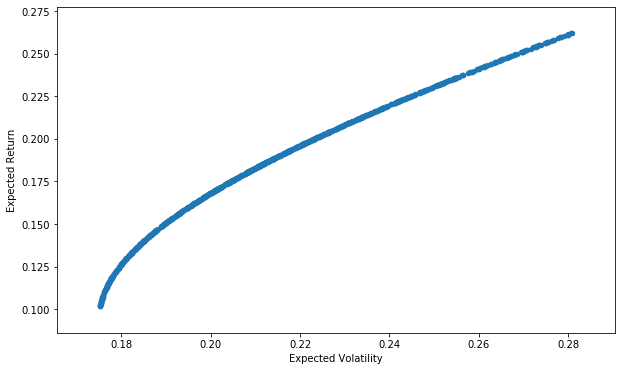

In [30]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')